In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movie_metadata.csv')

In [3]:
df['genres'] = df['genres'].str.replace('|', ' ')

In [4]:
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ')

In [5]:
df['texto'] = df[['genres', 'plot_keywords']].apply(
    lambda row: ' '.join(row.values.astype(str)), axis=1)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [7]:
tfidf = TfidfVectorizer(max_features=3000)

In [8]:
X = tfidf.fit_transform(df['texto'])

In [9]:
peliculas = pd.Series(df.index, index=df['movie_title'])

In [10]:
peliculas.index = peliculas.index.str.strip()

In [11]:
indice = peliculas['Titanic']

In [12]:
consulta = X[indice]

In [13]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [14]:
similitud = cosine_similarity(consulta, X)
similitud[0][3]

0.0

In [15]:
similitud = similitud.flatten()

In [16]:
similitud[3]

0.0

In [17]:
import matplotlib.pyplot as plt

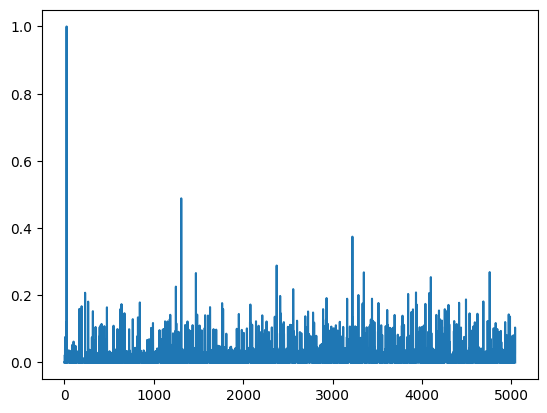

In [18]:
plt.plot(similitud)

In [19]:
(-similitud).argsort()

array([  26, 1308, 3222, ..., 2140, 2116, 5042], dtype=int64)

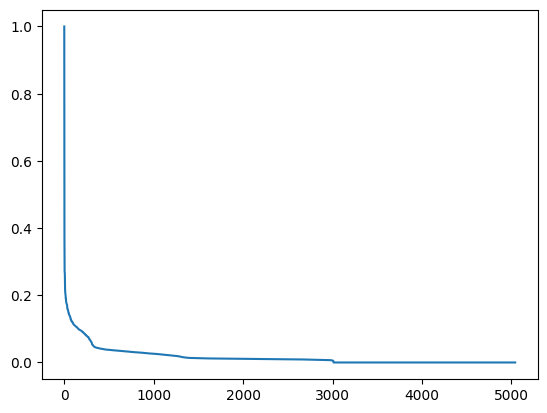

In [20]:
plt.plot(similitud[(-similitud).argsort()])

In [21]:
recomendacion = (-similitud).argsort()[0:16]

In [22]:
df[['movie_title', 'genres', 'plot_keywords']].iloc[recomendacion]

,movie_title,genres,plot_keywords
26,Titanic,Drama Romance,artist love ship titanic wet
1308,Raise the Titanic,Action Adventure Drama Thriller,military mineral ocean ship titanic
3222,The Chambermaid on the Titanic,Drama Romance,foundry foundry worker french friend titanic
2375,The Bounty,Action Adventure Drama History Romance,lieutenant lifeboat mutiny sailing ship ship
4757,The Living Wake,Comedy,artist black comedy
3350,Yeh Jawaani Hai Deewani,Comedy Drama Musical Romance,jealousy jumping into sea love swimming pool w...
1472,Superhero Movie,Action Comedy Sci-Fi Thriller,dragonfly hero high school soaking wet supervi...
4099,Basquiat,Biography Drama,andy warhol art artist friendship street artist
1248,Amistad,Drama History,courtroom mutiny ship slave ship slave trade
2560,Vicky Cristina Barcelona,Drama Romance,art artist painter sex summer
